<a href="https://colab.research.google.com/github/barbaractong/motor-imagery/blob/main/Classificador_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset information
**Link**: https://www.bbci.de/competition/iv/desc_1.html

**Calibration data**:

In the **first two runs**, arrows pointing left, right, or down were presented as visual cues on a computer screen. **Cues were displayed for a period of 4s during which the subject was instructed to perform the cued motor imagery task.** These periods were interleaved with 2s of blank screen and 2s with a fixation cross shown in the center of the screen. The fixation cross was superimposed on the cues, i.e. it was shown for 6s. These data sets are provided with complete marker information.

**Dict description:**

Data are provided in Matlab format (*.mat) containing variables:

- cnt: the continuous EEG signals, size [time x channels]. The array is stored in datatype INT16. To convert it to uV values, use cnt= 0.1*double(cnt); in Matlab.
- mrk: structure of target cue information with fields (the file of evaluation data does not contain this variable)
  - pos: vector of positions of the cue in the EEG signals given in unit sample, length #cues
  - y: vector of target classes (-1 for class one or 1 for class two), length #cues
- nfo: structure providing additional information with fields
  - fs: sampling rate,
  - clab: cell array of channel labels,
  - classes: cell array of the names of the motor imagery classes,
  - xpos: x-position of electrodes in a 2d-projection,
ypos: y-position of electrodes in a 2d-projection.

1. Instaling packages

In [ ]:
!pip install mne

2. Importing main libs

In [ ]:
import gdown
import glob
import math
import mne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as signal

from numpy.fft import fft
from scipy.io import loadmat

import gdown
import glob
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as signal

from numpy.fft import fft
from scipy.io import loadmat
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

3. Downloading eeg tranning data

In [ ]:
# download data from repository to colab - .mat files (100Hz samples)
!gdown --folder https://drive.google.com/drive/u/2/folders/1bQEWkMRg-ag8rxFpquOjG5qr_fS963Fv

Retrieving folder list
Processing file 1taU1yDNwVZGnXZkeJIIn9FGyPjGQq5Bp BCICIV_calib_ds1a.mat
Processing file 1Wz6qBceL0AB0qQeDvy_ua8XSO2k8Fewi BCICIV_calib_ds1b.mat
Processing file 1HO0Y-0iQubkBFmBmTkZmEAdUvsClg6Vk BCICIV_calib_ds1c.mat
Processing file 1rRNM7h6GOXXIMU9FWUpyy9p6ExHBTPyf BCICIV_calib_ds1d.mat
Processing file 10u6sUJAsX5RapEnByHECZ6CmjGxLqfkr BCICIV_calib_ds1e.mat
Processing file 10EKUll5aOnwtBCWTsYYt5n_0omhHIg0O BCICIV_calib_ds1f.mat
Processing file 1gyOwuzNHUwG7tRXqZA6qRQlHUgTU0bJb BCICIV_calib_ds1g.mat
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1taU1yDNwVZGnXZkeJIIn9FGyPjGQq5Bp
To: /content/calib/BCICIV_calib_ds1a.mat
100% 22.5M/22.5M [00:00<00:00, 81.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Wz6qBceL0AB0qQeDvy_ua8XSO2k8Fewi
To: /content/calib/BCICIV_calib_ds1b.mat
100% 22.5M/22.5M [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.go

- Loading tranning data

In [ ]:
def load_mat_file(fpath):
  return loadmat(fpath, struct_as_record = True)

path = '/content/calib'
dataFiles = r''+path+'/*.mat'
files = glob.glob(dataFiles)
files.sort()

# Loads all the trials into a list
trials = [load_mat_file(f) for f in files]

4. Downloading tranning data

In [ ]:
# download data from repository to colab - .mat files (100Hz samples)
!gdown --folder https://drive.google.com/drive/u/2/folders/16yaqlAGlQid77AldnbH343nOzMbhBvov

Retrieving folder list
Processing file 1rqNJQZXKucrFrt9V5zjxOT6uCHzxs_PL BCICIV_eval_ds1a.mat
Processing file 1P5l5y4smnB09Ahi23xnjT7eB-_1SnByU BCICIV_eval_ds1b.mat
Processing file 12grJey1YDpTpz2cgNPbWsZ249qKgzjcR BCICIV_eval_ds1c.mat
Processing file 1OtizSX9_ByALQ7062GAIBQIT_LOY4JrR BCICIV_eval_ds1d.mat
Processing file 10848wqxrItWtm2B6sHuEFSK1ZFui_htA BCICIV_eval_ds1e.mat
Processing file 1GH056gWaKrA5Pi1gdVFhM4GE7IPczUcL BCICIV_eval_ds1f.mat
Processing file 1jTveAdGXaSMfR4x_XP8walKA4iibE_zt BCICIV_eval_ds1g.mat
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1rqNJQZXKucrFrt9V5zjxOT6uCHzxs_PL
To: /content/eval/BCICIV_eval_ds1a.mat
100% 28.4M/28.4M [00:00<00:00, 135MB/s]
Downloading...
From: https://drive.google.com/uc?id=1P5l5y4smnB09Ahi23xnjT7eB-_1SnByU
To: /content/eval/BCICIV_eval_ds1b.mat
100% 29.1M/29.1M [00:00<00:00, 158MB/s] 
Downloading...
From: https://drive.google.com/uc

In [ ]:
def load_mat_file(fpath):
  return loadmat(fpath, struct_as_record = True)

path = '/content/calib'
dataFiles = r''+path+'/*.mat'
files = glob.glob(dataFiles)
files.sort()

# Loads all the trials into a list
evals = [load_mat_file(f) for f in files]

5. Prep the data

- In this step, it will be select only the tranning data that is from cue information to save the X_train matrix and the y_train vector. Also, all data will be loaded for future usages into a matrix
- Multiply each cnt data to convert to Volt

In [ ]:
X_train = []

for trial in range(0, len(trials)):
  for position in trials[trial]['mrk']['pos'][0][0][0]:
    X_train.append(trials[trial]['cnt'][position]*0.1) # Convert to Volt

In [ ]:
X_train = np.vstack(X_train) # Creates X_train matrix

In [ ]:
y_train = []

for trial in range(0, len(trials)):
  y_train.append(trials[trial]['mrk']['y'][0][0][0])

In [ ]:
X_train = np.vstack(X_train) # Creates X_train matrix

In [ ]:
y_train = np.hstack(y_train)

In [ ]:
X_train.shape

(1400, 59)

In [ ]:
y_train.shape

(1400,)

- Creates tranning data with class column

In [ ]:
tranning_matrix = np.hstack((X_train,  y_train.reshape(-1, 1)))

- Loads the eval matrix

In [ ]:
X_eval = []

for eval in range(0, len(evals)):
  X_eval.append(evals[eval]['cnt']*0.1) # Convert to Volt

In [ ]:
X_eval = np.vstack(X_eval) # Creates X_eval matrix

In [ ]:
X_eval.shape

(1333749, 59)

- Loads the channels information

In [ ]:
# Extract given param - Channel names
channel_id = [cid[0] for cid in trials[0]['nfo']['clab'][0][0][0]]

\#1 Run - 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C8', 'T8' channels

In [ ]:
channel_for_model_one = []
channel_labels_one = []
run_one_chann = ['T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C8', 'T8']
for idx, c in enumerate(channel_id):
  if c in run_one_chann:
    channel_labels_one.append(c)
    channel_for_model_one.append(idx)

print(channel_for_model_one)
print(channel_labels_one)

[24, 25, 26, 27, 28, 29, 30, 32]
['T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'T8']


In [ ]:
# Add the class column index to future slice
channel_for_model_one.append(59)

In [ ]:
print(channel_for_model_one)

[24, 25, 26, 27, 28, 29, 30, 32, 59]


In [ ]:
X_train_one = tranning_matrix[:, channel_for_model_one]

In [ ]:
X_train_one.shape

(1400, 9)

In [ ]:
X_train_one

array([[ 122.1,  107.3,  115.7, ...,  130.4,  127.8,    1. ],
       [ 128.5,  106.1,  156.1, ...,  132.4,   70.6,    1. ],
       [ 119.9,   65.2,  163.4, ...,  142.6,  106.5,   -1. ],
       ...,
       [   0.3,    3.7,   89.6, ...,  109.9,  -23.5,   -1. ],
       [  33.8,   24.5,   90.5, ...,   87.9,   97.4,    1. ],
       [-116.4, -163.6,  -80.5, ..., -110. , -183.8,    1. ]])

- Extract each row with within classification

In [ ]:
# Extract the last column containing labels
labels = X_train_one[:, -1]

# Create a boolean mask to filter rows with label equals -1
mask = (labels == -1)

# Use the mask to filter the original array
left_trial_one = X_train_one[mask][:, 0:8]

In [ ]:
# Extract the last column containing labels
labels = X_train_one[:, -1]

# Create a boolean mask to filter rows with label equals -1
mask = (labels == 1)

# Use the mask to filter the original array
right_trial_one = X_train_one[mask][:, 0:8]

In [ ]:
left_trial_one.shape

(700, 8)

In [ ]:
right_trial_one.shape

(700, 8)

- Load data params

In [ ]:
sample_rate = trials[0]['nfo']['fs'][0][0][0][0] # Hz

In [ ]:
print(f"Sample rate: {sample_rate} Hz")

Sample rate: 100 Hz


In [ ]:
# basic settings
N_samples, N_channels = right_trial_one.shape # both left and right has the same shape
T = N_samples/sample_rate
t = np.arange(0, T, 1/sample_rate)
f = np.arange(0, sample_rate, 1/T)

In [ ]:
# defines time window func
def segmenting(data, seg_length, sample_rate):
  N_samples = data.shape[0]
  N_dims = len(data.shape)
  N_seg = seg_length*sample_rate
  start_seg = np.rint(np.arange(0, N_samples - N_seg + 1, N_seg)).astype(int)
  end_seg = (start_seg + np.rint(N_seg)).astype(int)

  for i in range(len(start_seg)):

    cut_data = data[start_seg[i]:end_seg[i],]
    expand_data = np.expand_dims(cut_data, N_dims)

    if i == 0:
      seg_data = expand_data
    else:
      seg_data = np.concatenate((seg_data, expand_data), N_dims)

  return seg_data

- Define alpha and beta filter:

  From article main: somatotopically matched sensorimotor 7–30 Hz rhythms were diminished over pericentral cortices.

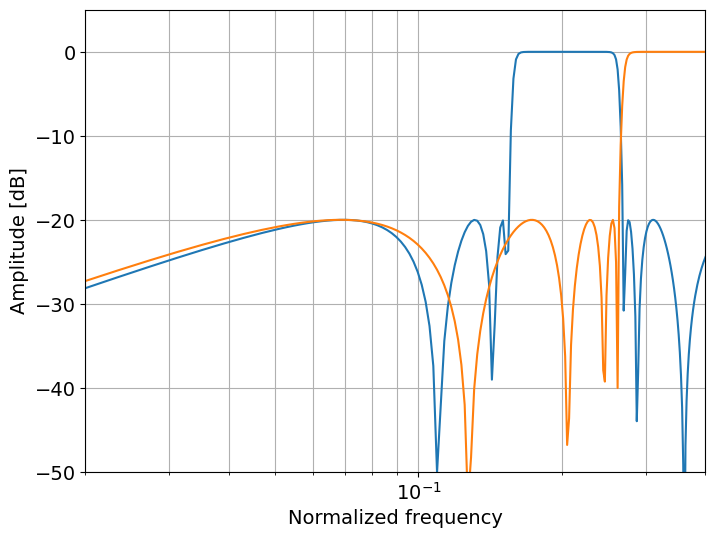

In [ ]:
fp = np.array([[8, 13], [13.5, 30]])
fs = np.array([[7.5, 13.5], [13, 30.5]])
wp = fp/(sample_rate/2)
ws = fs/(sample_rate/2)

gpass = [1, 3]
gstop = 20

fig = plt.figure(figsize=(8, 6))
plt.rcParams.update({"font.size": 14})
ax = fig.add_subplot(1, 1, 1)

for i in range(wp.shape[0]):

  N, Wn = signal.cheb2ord(wp[i, :], ws[i, :], gpass[i], gstop)
  b, a = signal.cheby2(N, gstop, Wn, 'bandpass')
  w, h = signal.freqz(b, a)
  ax.semilogx(w/np.pi, 20*np.log10(abs(h)))

ax.set_xlabel('Normalized frequency')
ax.set_ylabel('Amplitude [dB]')
ax.grid(which='both', axis='both')
ax.axis([0.02, 0.4, -50, 5])
plt.show()

- Feature extraction and visualization

In [ ]:
N_alpha, Wn_alpha = signal.cheb2ord(wp[0, :], ws[0, :], gpass[0], gstop)
sos_alpha = signal.cheby2(N_alpha, gstop, Wn_alpha, 'bandpass', output='sos')

N_beta, Wn_beta = signal.cheb2ord(wp[1, :], ws[1, :], gpass[1], gstop)
sos_beta = signal.cheby2(N_beta, gstop, Wn_beta, 'bandpass', output='sos')

In [ ]:
right_trial_one.shape

(700, 8)

In [ ]:
seg_right_one = segmenting(right_trial_one, 2, sample_rate) # time segmentation - 7s for each windown

In [ ]:
alpha_right_one = signal.sosfilt(sos_alpha, right_trial_one, axis=0)
beta_right_one = signal.sosfilt(sos_beta, right_trial_one, axis=0)

In [ ]:
seg_right_one.shape

(200, 8, 3)

In [ ]:
seg_left_one = segmenting(left_trial_one, 2, sample_rate) # time segmentation - 4s for each windown

alpha_left_one = signal.sosfilt(sos_alpha, left_trial_one, axis=0)
beta_left_one = signal.sosfilt(sos_beta, left_trial_one, axis=0)

In [ ]:
# fft comparing plot function
def fft_comparing_plot(data1, data2, f, ch_names, T, interval):

  N_channels = len(ch_names)
  fig = plt.figure(figsize=(12, 20))
  plt.rcParams.update({"font.size": 14})
  start_plot = math.floor(interval[0]*T)
  end_plot = math.floor(interval[1]*T)

  for i in range(N_channels):

    ax = fig.add_subplot(N_channels, 1, i + 1)
    ax.plot(f[start_plot:end_plot], data1[start_plot:end_plot, i])
    ax.plot(f[start_plot:end_plot], data2[start_plot:end_plot, i])
    ax.set_ylabel(ch_names[i])

    if(i==1):
      ax.set_xlabel('Frequency (Hz)')
      ax.legend(['Left', 'Right'])

  plt.show()

In [ ]:
fft_alpha_right = np.abs(fft(alpha_right_one, axis=0))
fft_beta_right = np.abs(fft(beta_right_one, axis=0))

fft_alpha_left = np.abs(fft(alpha_left_one, axis=0))
fft_beta_left = np.abs(fft(beta_left_one, axis=0))

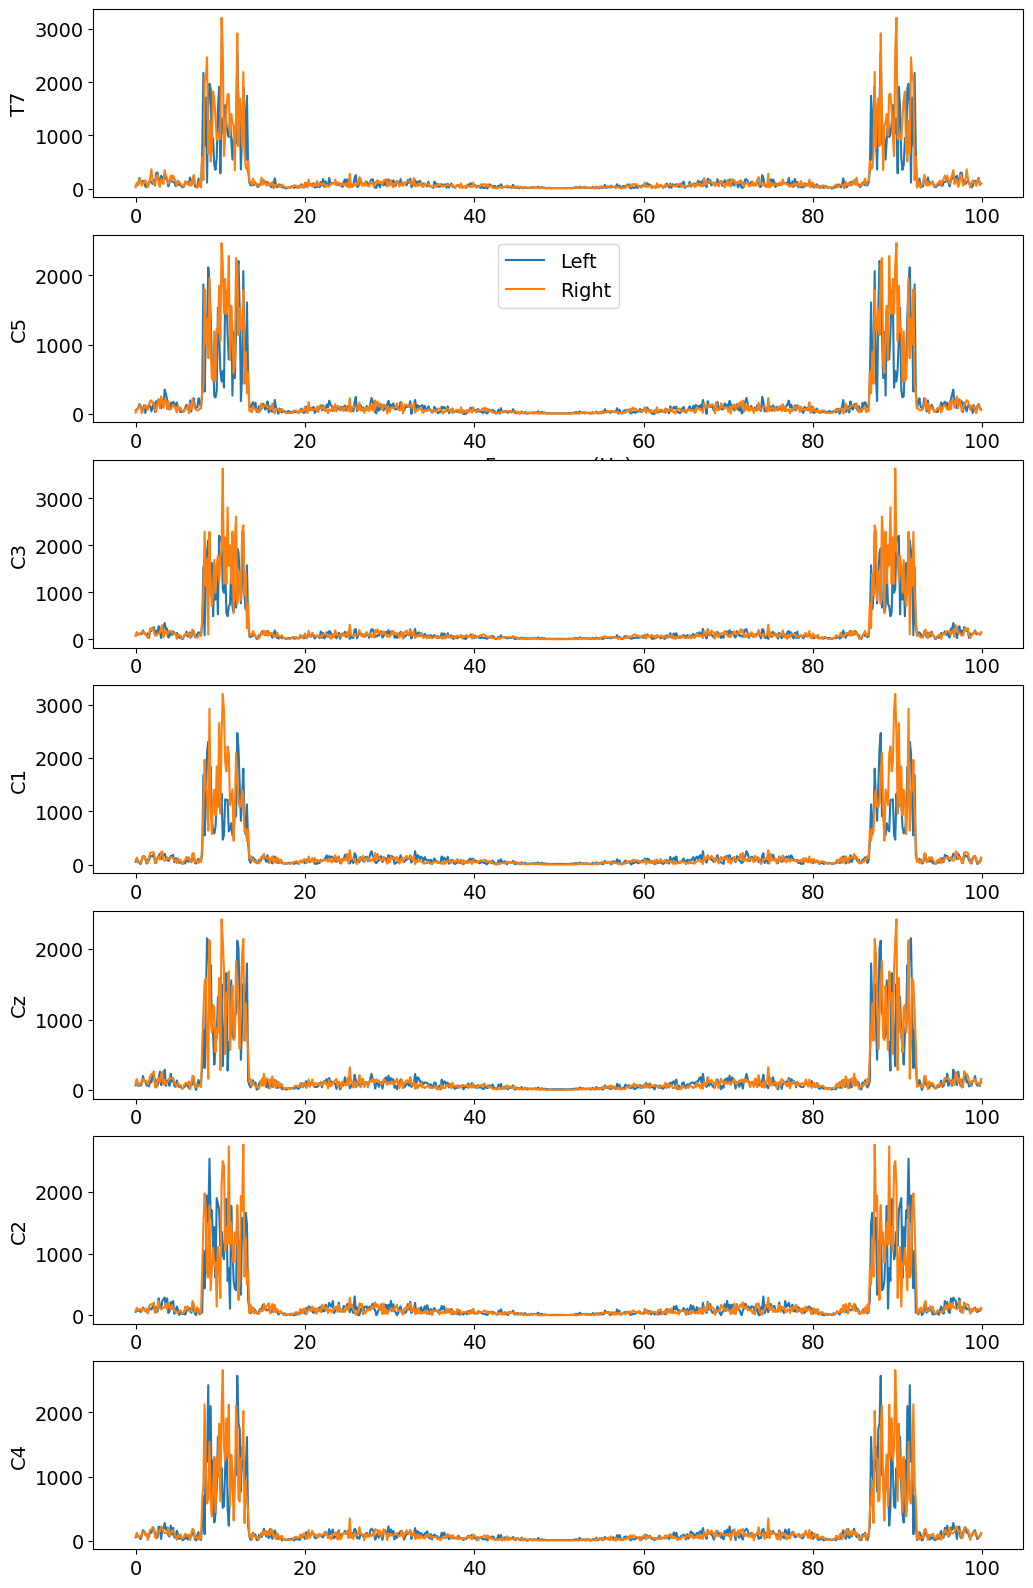

In [ ]:
fft_comparing_plot(fft_alpha_right, fft_alpha_left, f, run_one_chann[0:7], T, [0, 120]) # Alpha

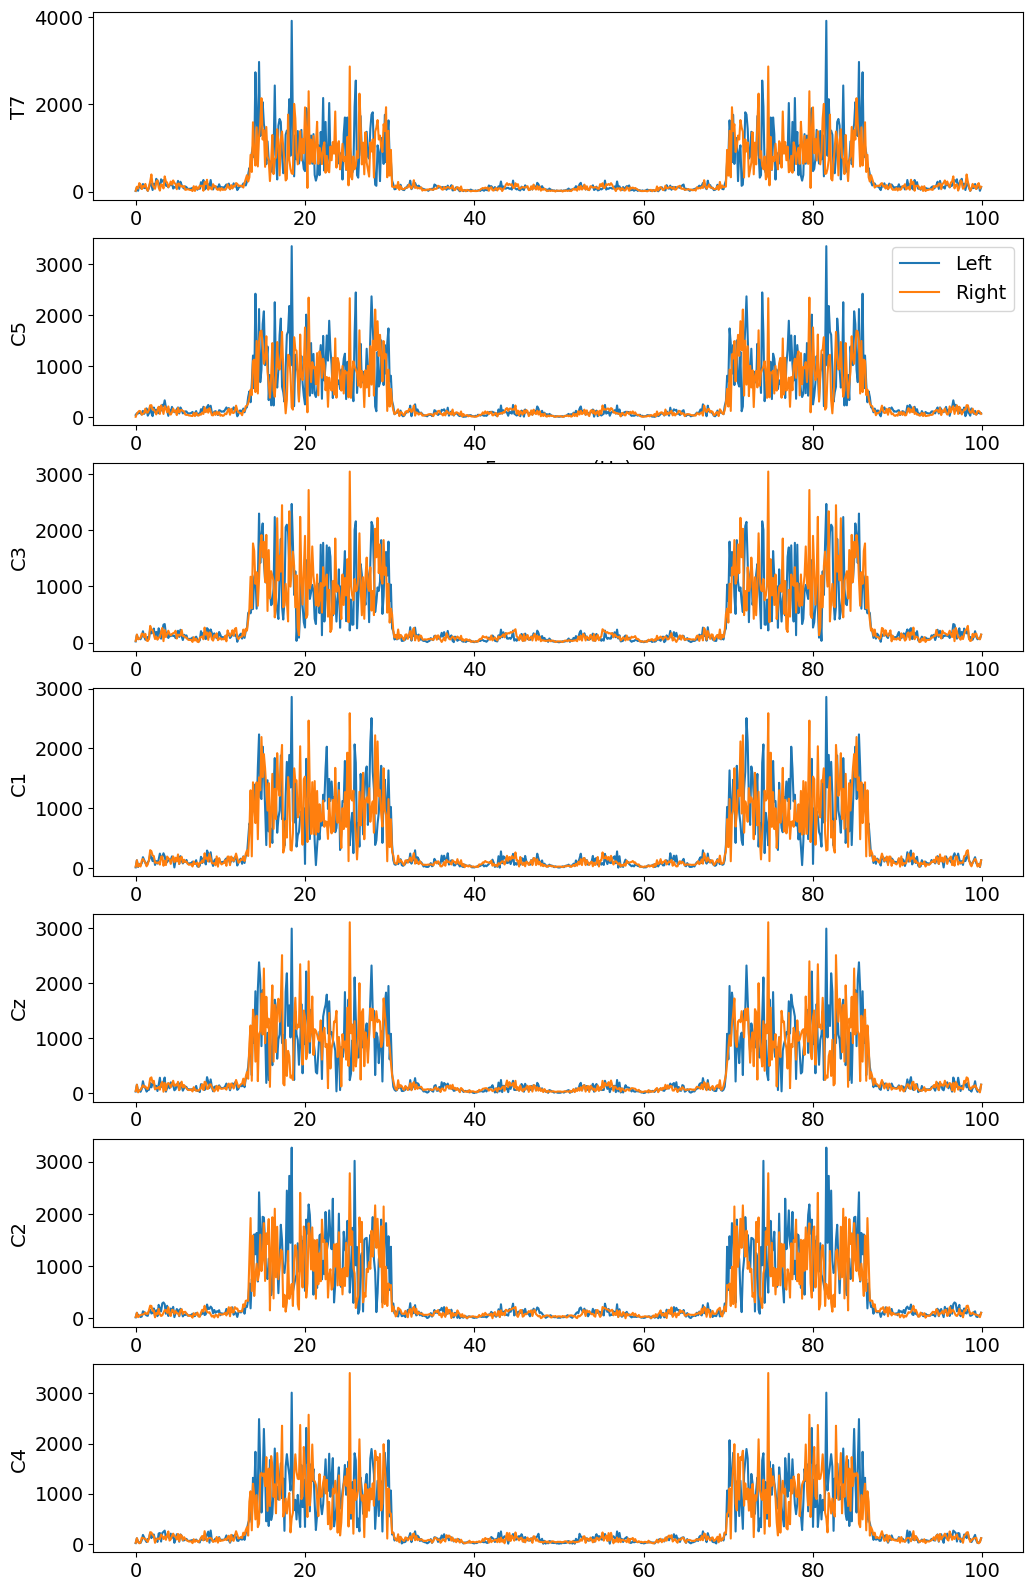

In [ ]:
fft_comparing_plot(fft_beta_right, fft_beta_left, f, run_one_chann[0:7], T, [0, 120]) # Beta

- Feature extraction

In [ ]:
alpha_seg_data_rigth_one = signal.sosfilt(sos_alpha, seg_right_one, axis=2)
beta_seg_data_rigth_one = signal.sosfilt(sos_beta, seg_right_one, axis=1)

# feature extraction
log_var_alpha_right_one = np.log(np.var(alpha_seg_data_rigth_one, axis=2))
log_var_beta_right_one = np.log(np.var(beta_seg_data_rigth_one, axis=2))

In [ ]:
log_var_beta_right_one.shape

(200, 8)

In [ ]:
alpha_seg_data_left_one = signal.sosfilt(sos_alpha, seg_left_one, axis=2)
beta_seg_data_left_one = signal.sosfilt(sos_beta, seg_left_one, axis=2)

# feature extraction
log_var_alpha_left_one = np.log(np.var(alpha_seg_data_left_one, axis=2))
log_var_beta_left_one = np.log(np.var(beta_seg_data_left_one, axis=2))

In [ ]:
log_var_beta_left_one.shape

(200, 8)

In [ ]:
def mount_attribute_matrix_eval(log_var_alpha, log_var_beta):

  # attribute matrix
  X = np.vstack((log_var_alpha, log_var_beta))
  # X = np.transpose(X)

  # label vector
  N_seg = log_var_alpha.shape[1]
  lv = np.hstack((np.ones(N_seg), -np.ones(N_seg)))

  # shuffle
  idx = np.arange(2*N_seg)
  np.random.shuffle(idx)
  X = X[idx,]
  lv = lv[idx,]

  return X, lv

In [ ]:
def mount_attribute_matrix(log_var_alpha_left_one, log_var_alpha_right_one, log_var_beta_left_one, log_var_beta_seg_data_left_one):

  # attribute matrix
  vstack_left_hand = np.vstack(
      (log_var_alpha_left_one, log_var_alpha_right_one))
  vstack_right_hand = np.vstack(
      (log_var_beta_left_one, log_var_beta_seg_data_left_one))

  X = np.hstack((vstack_left_hand, vstack_right_hand))
  X = np.transpose(X)

  # label vector
  N_seg = log_var_alpha_left_one.shape[1]
  lv = np.hstack((np.ones(N_seg), -np.ones(N_seg)))

  # shuffle
  idx = np.arange(2*N_seg)
  np.random.shuffle(idx)
  X = X[idx,]
  lv = lv[idx,]

  return X, lv

In [ ]:
def linear_classifier_training(X, lv):

  X = np.hstack((np.ones((X.shape[0], 1)), X))
  w = np.matmul(np.linalg.pinv(X), lv)

  return w

In [ ]:
def linear_classifier_predicting(X, w):

  X = np.hstack((np.ones((X.shape[0], 1)), X))
  g = np.matmul(X, np.transpose(w))

  return g

In [ ]:
def linear_classifier_predictingeval(X, w):

  X = np.hstack((np.ones((X.shape[0], 1)), X))
  g = np.matmul(X, np.transpose(w))

  return g

In [ ]:
# kfold cross validation
kf = KFold(n_splits=3, shuffle=True)

In [ ]:
seg_data = np.vstack((seg_right_one, seg_left_one))

In [ ]:
seg_data.shape

(400, 8, 3)

In [ ]:
for i, (train_idx, test_idx) in enumerate(kf.split(range(seg_data.shape[-1]))):

  print(i)

  # attribute matrix
  X_train, lv_train = mount_attribute_matrix(log_var_alpha_left_one[:, train_idx],
                                             log_var_alpha_right_one[:, train_idx],
                                             log_var_beta_left_one[:, train_idx],
                                             log_var_beta_right_one[:, train_idx])

  X_test, lv_test =  mount_attribute_matrix(log_var_alpha_left_one[:, train_idx],
                                             log_var_alpha_right_one[:, train_idx],
                                             log_var_beta_left_one[:, train_idx],
                                             log_var_beta_right_one[:, train_idx])

  # classifier training
  w = linear_classifier_training(X_train, lv_train)
  # classfier predicting
  g = linear_classifier_predicting(X_test, w)

  # evaluating
  N_erros = len(np.where((np.sign(g) - lv_test) != 0)[0])
  rate = (X_test.shape[0] - N_erros)/(X_test.shape[0])

  if i == 0:

    cat_w = w
    cat_rate = rate

  else:

    cat_w = np.vstack((cat_w, w))
    cat_rate = np.hstack((cat_rate, rate))

0
1
2


In [ ]:
# projection of classifier boundary
x = np.linspace(np.min(X_train[:, [0, 1]]), np.max(X_train[:, [0, 1]]), 100)
z = np.mean(X_train[:, 2])
w = np.mean(X_train[:, 3])

for i in range(cat_w.shape[0]):

  a = -cat_w[i, 1]/cat_w[i, 2]
  b = -(cat_w[i, 3]*z + cat_w[i, 4]*w + cat_w[i, 0])/cat_w[i, 2]
  y = a*x + b

  if i == 0:

    cat_y = y

  else:

    cat_y = np.vstack((cat_y, y))

mean_y = np.mean(cat_y, axis=0)
mean_rate = np.mean(cat_rate, axis=0)

In [ ]:
mean_rate

1.0

- Prep test data

In [ ]:
# basic settings
N_samples, N_channels = X_eval.shape # both left and right has the same shape
T = N_samples/sample_rate
t = np.arange(0, T, 1/sample_rate)
f = np.arange(0, sample_rate, 1/T)

In [ ]:
N_alpha, Wn_alpha = signal.cheb2ord(wp[0, :], ws[0, :], gpass[0], gstop)
sos_alpha = signal.cheby2(N_alpha, gstop, Wn_alpha, 'bandpass', output='sos')

N_beta, Wn_beta = signal.cheb2ord(wp[1, :], ws[1, :], gpass[1], gstop)
sos_beta = signal.cheby2(N_beta, gstop, Wn_beta, 'bandpass', output='sos')

In [ ]:
channel_for_model_one.pop()

59

In [ ]:
seg_eval_one= segmenting(X_eval[:, channel_for_model_one], 2, sample_rate) # time segmentation - 4s for each windown

In [ ]:
seg_eval_one.shape

(200, 8, 6668)

In [ ]:
alpha_right_eval = signal.sosfilt(sos_alpha, seg_eval_one, axis=2)
beta_right_eval = signal.sosfilt(sos_beta, seg_eval_one, axis=2)

In [ ]:
log_var_alpha = np.log(np.var(alpha_right_eval, axis=2))
log_var_beta = np.log(np.var(beta_right_eval, axis=2))

- Model test rate

In [ ]:
# classfier models
model_names = [
    'Logistic Regression',
    'Nearest Centroid',
    'Decision Tree',
    'SVM',
    'MLP'
]

models = [
    LogisticRegression(solver='liblinear', random_state=1),
    NearestCentroid(),
    DecisionTreeClassifier(random_state=1),
    svm.SVC(kernel='rbf', random_state=1),
    MLPClassifier(max_iter=2000, random_state=1)
]

In [ ]:
# metrics
metric_names = ['Accuracy']

def metrics(y_predict, y_true):

  accuracy = accuracy_score(y_predict, y_true)

  return accuracy

In [ ]:
# k-fold cross validation
def k_fold_cross_validation(X, y, model, n_splits=5):

  kf = KFold(n_splits=n_splits)
  cat_y_predict = cat_y_true = []

  for i, (train_idx, test_idx) in enumerate(kf.split(X, y)):

    X_train = X[train_idx, :]; y_train = y[train_idx]
    X_test = X[test_idx, :]; y_test = y[test_idx]

    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    y_true = y_test

    cat_y_predict = np.hstack((cat_y_predict, y_predict))
    cat_y_true = np.hstack((cat_y_true, y_true))

  return cat_y_predict, cat_y_true

In [ ]:
# evaluate models using k-fold
def evalaute_using_k_fold(X, y, models):

  for i, model in enumerate(models):
    print(model)

    y_predict, y_true = k_fold_cross_validation(X, y, model)

    if i == 0:

      cat_metrics = metrics(y_predict, y_true)

    else:

      cat_metrics = np.vstack((cat_metrics, metrics(y_predict, y_true)))

  return cat_metrics

In [ ]:
evalaute_using_k_fold(X_train_one[:, 0:8], y_train, models)

LogisticRegression(random_state=1, solver='liblinear')
NearestCentroid()
DecisionTreeClassifier(random_state=1)
SVC(random_state=1)
MLPClassifier(max_iter=2000, random_state=1)


array([[0.47285714],
       [0.50714286],
       [0.52714286],
       [0.50071429],
       [0.49285714]])

- Logistic regression evaluation data

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train_one[:, 0:8], y_train)

In [ ]:
clf.predict(X_eval[:, channel_for_model_one])

array([ 1,  1,  1, ..., -1, -1, -1], dtype=int16)

In [ ]:
clf.score(X_train_one[:, 0:8], y_train)

0.5307142857142857

- Nearest centroid

In [ ]:
clf = NearestCentroid()

In [ ]:
clf.fit(X_train_one[:, 0:8], y_train)

NearestCentroid()

In [ ]:
clf.predict(X_eval[:, channel_for_model_one])

array([ 1,  1,  1, ..., -1, -1, -1], dtype=int16)

In [ ]:
clf.score(X_train_one[:, 0:8], y_train)

0.5092857142857142

- Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(clf, X_train_one[:, 0:8], y_train, cv=10).mean()

0.522142857142857

- PCA feature extractor

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [ ]:
std_slc = StandardScaler()
X_std = std_slc.fit_transform(X_train_one[:, 0:8])

print(X_std.shape)
print(X_std)

(1400, 8)
[[ 1.18804646  1.39217     0.97468853 ...  1.29835617  1.49960583
   1.5215734 ]
 [ 1.28515911  1.37051997  1.5467805  ...  1.17885156  1.53209371
   0.59575718]
 [ 1.15466399  0.63261499  1.65015355 ...  1.46884942  1.69778191
   1.17682016]
 ...
 [-0.66012866 -0.47694874  0.60509447 ...  1.23302698  1.16660504
  -0.9273076 ]
 [-0.15180463 -0.10168166  0.61783909 ...  0.8251179   0.80923833
   1.02953121]
 [-2.43091713 -3.49532292 -1.80363927 ... -1.95057594 -2.4054376
  -3.52185898]]


In [ ]:
pca = decomposition.PCA(n_components=8)

X_std_pca = pca.fit_transform(X_std)

print(X_std_pca.shape)
print(X_std_pca)

(1400, 8)
[[ 3.73172329  0.17422412  0.38781224 ... -0.29205989  0.08358859
   0.30254435]
 [ 3.53759199 -0.22513605 -0.52672886 ... -0.34602482 -0.28460368
   0.74567822]
 [ 3.87928041 -0.75984822  0.14701912 ... -0.16573826  0.01234683
   0.58852538]
 ...
 [ 0.65869068 -1.97118617 -0.16785551 ... -0.37003029 -0.51644316
   0.33212339]
 [ 1.18556516 -0.37670757  0.89260826 ...  0.18201062 -0.47610131
   0.20990983]
 [-6.97192411 -1.67795826 -0.80532621 ...  0.06505407  0.2031987
   0.18496535]]


In [ ]:
X_test = pca.transform(X_eval[:, channel_for_model_one])

- PCA w/ Logistic regression

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_std_pca, y_train)

In [ ]:
clf.predict(X_test)

array([-1, -1, -1, ..., -1, -1, -1], dtype=int16)

In [ ]:
clf.score(X_train_one[:, 0:8], y_train)

0.49714285714285716

- PCA w/ Nearest centroid

In [ ]:
clf = NearestCentroid()

In [ ]:
clf.fit(X_std_pca, y_train)

NearestCentroid()

In [ ]:
clf.score(X_std_pca, y_train)

0.5092857142857142

- PCA w/ Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
cross_val_score(clf, X_std_pca, y_train, cv=10).mean()

0.4992857142857144